In [143]:
import numpy as np
import math
import cv2
import PIL
import math
import matplotlib.pyplot as plt
import scipy.signal 
from skimage import data, filters
from skimage.filters import gaussian

Defining 1-D Gaussian filter using the known formula

In [144]:
def OneDimensionalGaussian(std, x):
  return [(1/(std * math.sqrt(2*math.pi)))* math.exp(-float(x)**2/(2*std**2))]

DEFINING 1-D GAUSSIAN MASK FOR FIRST DERIVATIVE IN X AND Y AND NAMING IT GX AND GY

In [145]:
def GaussX(std,x):
  Gx= (-x / (math.sqrt(2*math.pi) * (std**2)) * math.exp(-float(x)**2/(2* (std**2))))
  return Gx

def GaussY(std,y):
  Gy= (-y / (math.sqrt(2*math.pi) * (std**2)) * math.exp(-float(y)**2/(2* (std**2))))
  return Gy

CONVOLVING IMAGE THE IMAGE I WITH G ALONG THE ROWS TO GIVE THE X COMPONENT IMAGE(IX) ADN DOWN THE COLUMNS TO GIVE THE Y COMPONENT IMAGE (IY).

In [172]:
def canny_edge_Detect(image,std):

  image0=cv2.imread(image,0)
  image1=np.array(image0)
  # Shape=np.shape(image1)
  height,width=image0.shape
  #creating gaussian mask
  g=[]
  for i in range(-1,2):
    g=np.array(OneDimensionalGaussian(std,i))

  print("g", g)


  #convolving I with Gaussian g along the rows(x-direction)
  Imagex=[]
  print("Image1", image1)
  for i in range(height):
    temp2= np.convolve(image1[i,:], g,'same')
    print("temp2", temp2)
    Imagex.append(np.array(temp2))
  plt.title('Along the X direction')
  plt.imshow(Imagex,cmap='gray')
  plt.show()

  #convolving I with Gaussian g along the column(y-direction)
  Imagey1=[]
  for i in range(width):
    temp5=np.convolve(image1[:,i],g,'same')
    Imagey1.append(np.array(temp5))

  Imagey=np.transpose(Imagey1)
  plt.title('Along the Y direction')
  plt.imshow(Imagey,cmap='gray')
  plt.show()

  #creating mask with 1st derivative function for x
  Gx=[]
  for i in range(-1,2):
    temp1= GaussX(std,i)
    Gx.append(temp1)
  
  print("gx", Gx)

  Ix=np.array(Imagex)
  Shape=np.shape(Ix)

  #convolving I with Gaussian gx
  ImageGx=[]
  temp3=[]
  for i in range(height):
    temp3=(np.convolve(np.array(Imagex)[i,:],Gx,'same'))
    ImageGx.append(np.array(temp3))
  
  plt.title('Along the X direction after 1st derivative')
  plt.imshow(ImageGx,cmap='gray')
  plt.show()

  #creating mask with 1st derivative function for y
  Gy=[]
  for i in range(-1,2):
    temp4= GaussY(std,i)
    Gy.append(temp4)

  print("Gy", Gy)

  sy=np.array(Imagey)
  Shape=np.shape(sy)
  #width=sy.shape[1]

  #convolving I with Gaussian gy
  ImageGy=[]
  ImageGy0=[]
  temp6=[]
  for i in range(width):
    temp6=(np.convolve(np.array(Imagey)[:,i],Gy,'same'))
    ImageGy0.append(np.array(temp6))
  ImageGy=np.transpose(ImageGy0)
  
  plt.title('Along the Y direction after 1st derivative')
  plt.imshow(ImageGy,cmap='gray')
  plt.show()

  #Edge gradient direction
  thdirt=np.arctan2(Imagex,Imagey)

  #Magnitude of the edge
  Mag=np.sqrt(np.square(ImageGx)+np.square(ImageGy))
  plt.title("magnitude")
  plt.imshow(Mag, cmap='gray')
  
  #non-max suppression
  new_Mag=np.copy(Mag)
  for x in range(height-1):
        for y in range(width-1):
            if thdirt[x][y] > -22.5 and thdirt[x][y] <= 22.5:
                if Mag[x][y] < Mag[x+1][y]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > 22.5 and thdirt[x][y] <= 67.5:
                if Mag[x][y] < Mag[x+1][y-1]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > 67.5 and thdirt[x][y] <= 112.5:
                if Mag[x][y] < Mag[x][y-1]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > 112.5 and thdirt[x][y] <= 157.5:
                if Mag[x][y] < Mag[x-1][y-1]:
                    new_Mag[x][y] = 0
            if (thdirt[x][y] > 157.5 and thdirt[x][y] <= 180) or (thdirt[x][y] >= -180 and thdirt[x][y] < -157.5):
                if Mag[x][y] < Mag[x-1][y]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > -157.5 and thdirt[x][y] <= -112.5:
                if Mag[x][y] < Mag[x-1][y+1]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > -112.5 and thdirt[x][y] <= -67.5:
                if Mag[x][y] < Mag[x][y+1]:
                    new_Mag[x][y] = 0
            if thdirt[x][y] > -67.5 and thdirt[x][y] <= -22.5:
                if Mag[x][y] < Mag[x+1][y+1]:
                    new_Mag[x][y] = 0

  
  # #Hysteris thresholding

  # high_thre, thresh_im = cv2.threshold(new_Mag, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # low_thre = 0.5*high_thre
  # plt.imshow(thresh_im, cmap='gray')

  v = np.mean(new_Mag)
  v1 = np.median(new_Mag)
  print('v',v1)
  #low is set to -25% of v and high is set to +25% of v
  low_thre = 0.01
  high_thre = 0.25
 
  height1=new_Mag.shape[0]
  width1=new_Mag.shape[1]
  fianl_img=np.zeros((height1,width1))
  low_thre1=new_Mag.max()*low_thre
  high_thre1=new_Mag.max()*high_thre
  for x in range(0,height1):
        for y in range(0,width1):
            if new_Mag[x][y] < low_thre1:
                new_Mag[x][y] = 0
            if new_Mag[x][y] > high_thre1:
                new_Mag[x][y] = 255
            if new_Mag[x][y] > low_thre1 and image1[x][y] < high_thre1:
                for s in range(-1, 2):
                        for t in range(-1, 2):
                            if x+s > -1 and y+t > -1 and x+s < new_Mag.height1 and y+t < new_Mag.width1 and new_Mag[x+s][y+t] >= low_thre1 and new_Mag[x+s][y+t] < high_thre1: new_Mag[x+s][y+t] = 255
  
  plt.imshow(new_Mag, cmap='gray')
  plt.title("Final Image")


Streaming output truncated to the last 5000 lines.
 17.96242977 18.15981911 18.15981911 18.15981911 19.1467658  18.75198712
 17.56765109 15.79114705 14.40942168 13.22508566 11.84336029 10.46163492
  8.48774154  8.09296286  6.90862683  5.32951213  4.53995478  5.13212279
  6.51384816  7.50079485  5.92168014  6.51384816  7.10601617  6.90862683
  6.31645882  6.11906948  6.31645882  6.90862683  6.11906948  5.52690147
  6.7112375   8.68513088  8.88252022  7.69818419  7.69818419  9.27729889
  9.27729889  8.2903522   7.30340551  6.90862683  7.50079485  8.09296286
  8.68513088  8.88252022  8.68513088  9.27729889  9.07990955  7.89557353
  7.69818419  8.88252022 10.46163492 11.25119227  9.67207757 10.46163492
  9.47468823  9.07990955  9.86946691  8.88252022  7.69818419  8.88252022
  9.07990955 10.26424558 11.64597095 13.42247499 16.38331507 17.56765109
 14.80420036 10.65902426  8.48774154  6.90862683  5.32951213  4.73734412
  5.32951213  5.72429081  5.52690147  4.93473345  4.53995478 10.06685625


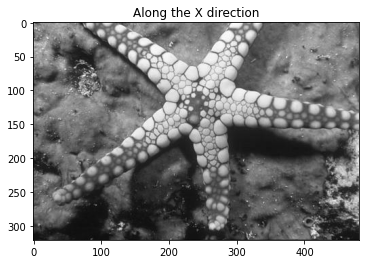

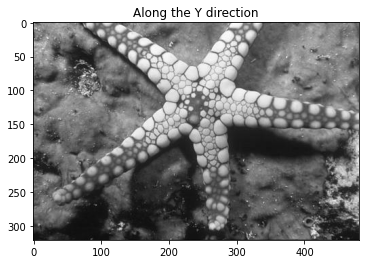

gx [0.11611137537653808, 0.0, -0.11611137537653808]


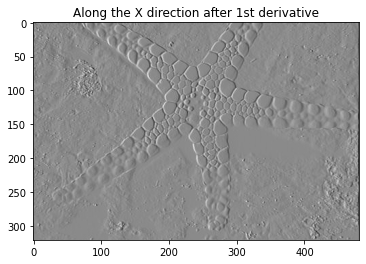

Gy [0.11611137537653808, 0.0, -0.11611137537653808]


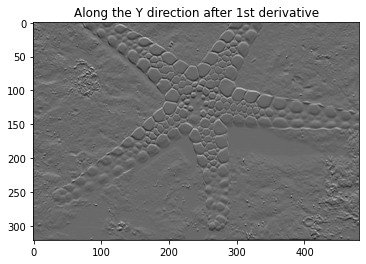

v 0.022919147536113238


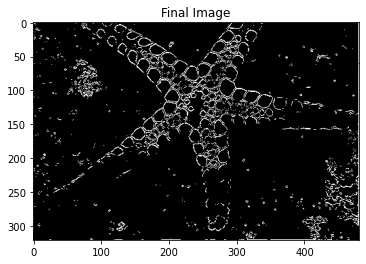

In [173]:
canny_edge_Detect('test3.jpg',1.7)